In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

%matplotlib inline
sns.set_style("whitegrid")

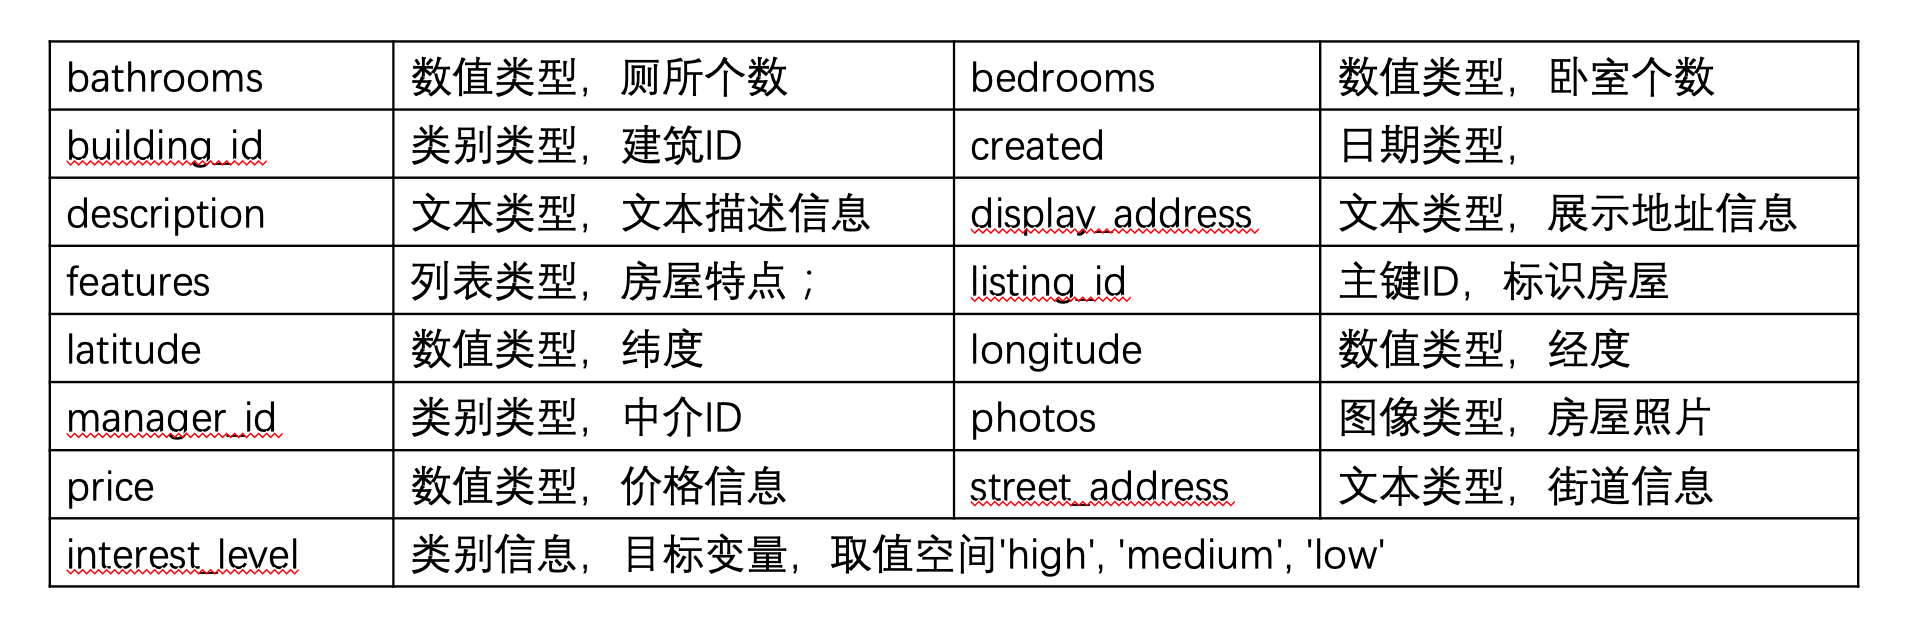

- https://matplotlib.org/gallery/index.html
- https://seaborn.pydata.org/

In [ ]:
train_data = pd.read_json('../input/train.json.zip', compression='zip')
train_data.head()

In [ ]:
# 缺失值
train_data.isnull().sum()

In [ ]:
# 标签分布
sns.countplot(train_data.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [ ]:
# 用map也可以实现
train_data['interest'] = np.where(train_data.interest_level=='low', 0,
                                  np.where(train_data.interest_level=='medium', 1, 2))

# Bathrooms

In [ ]:
### Bathrooms graphs
fig = plt.figure(figsize=(12,12))
sns.countplot(train_data.bathrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

### Average number of Bathrooms per Interest Level
sns.barplot(x='interest_level', y='bathrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');

### Average interest for every number of bathrooms
sns.pointplot(x="bathrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Average Interest');

# Bedrooms

In [ ]:
### Bedrooms graphs
fig = plt.figure(figsize=(12,12))
sns.countplot(train_data.bedrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');

### Average number of Bedrooms per Interest Level
sns.barplot(x='interest_level', y='bedrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bedrooms');

### Average interest for every number of bedrooms
sns.pointplot(x="bedrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Average Interest');

# building_id

In [ ]:
### Most advertised buildings
train_data.building_id.value_counts().nlargest(10)

# created

In [ ]:
### Convertion to Python Date
train_data.created = pd.to_datetime(train_data.created, format='%Y-%m-%d %H:%M:%S')

In [ ]:
### New Month, Day of Week and Hour Features
train_data['month'] = train_data.created.dt.month
train_data['day_of_week'] = train_data.created.dt.weekday
train_data['hour'] = train_data.created.dt.hour

In [ ]:
### Iterest per month
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=train_data);
plt.xlabel('Month');
plt.ylabel('Number of occurrences')

### Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

In [ ]:
### Iterest per Day of Week
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="day_of_week", hue="interest_level",
                   hue_order=['low', 'medium', 'high'], data=train_data);
plt.xlabel('Day of Week');
plt.ylabel('Number of occurrences');

### Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

In [ ]:
### Iterest per Day of Week
fig = plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train_data);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

In [ ]:
### Number of unique Display Addresses
print('Number of Unique Display Addresses is {}'.format(train_data.display_address.value_counts().shape[0]))

In [ ]:
### 15 most popular Display Addresses
train_data.display_address.value_counts().nlargest(15)

In [ ]:
### Top 20 northernmost points
train_data.latitude.nlargest(20)

In [ ]:
### Top 20 southernmost points
train_data.latitude.nsmallest(20)

In [ ]:
### Top 20 easternmost points
train_data.longitude.nlargest(20)

In [ ]:
### Top 20 westernmost points
train_data.longitude.nsmallest(20)

In [ ]:
### Rent interest graph of New-York
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train_data[(train_data.longitude>train_data.longitude.quantile(0.005))
                           &(train_data.longitude<train_data.longitude.quantile(0.995))
                           &(train_data.latitude>train_data.latitude.quantile(0.005))                           
                           &(train_data.latitude<train_data.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

In [ ]:
### Let's get a list of top 10 managers
top10managers = train_data.manager_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="manager_id", hue="interest_level",
                   data=train_data[train_data.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

plt.xticks([])
### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")
    

In [ ]:
### Getting number of photos
train_data['photos_number'] = train_data.photos.str.len()

In [ ]:
### Number of photos graphs
fig = plt.figure(figsize=(12,12))
### Average number of Photos per Interest Level
sns.barplot(x="interest_level", y="photos_number", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(221));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Photos');
### Average interest for every number of photos
sns.barplot(x="photos_number", y="interest", data=train_data, ax=plt.subplot(222));
plt.xlabel('Number of Photos');
plt.ylabel('Average Interest');
### Number of occurrences
sns.countplot(x='photos_number', hue='interest_level', hue_order=['low', 'medium', 'high'],
              data=train_data, ax=plt.subplot(212));
plt.xlabel('Number of Photos');
plt.ylabel('Number of occurrences');

In [ ]:
### Price exploration
fig = plt.figure(figsize=(12,12))
### Price distribution
sns.distplot(train_data.price[train_data.price<=train_data.price.quantile(0.99)], ax=plt.subplot(211));
plt.xlabel('Price');
plt.ylabel('Density');

### Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(223));
plt.xlabel('Interest Level');
plt.ylabel('Price');

### Violinplot of price for every Interest Level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
               data=train_data[train_data.price<=train_data.price.quantile(0.99)],
               ax=plt.subplot(224));
plt.xlabel('Interest Level');
plt.ylabel('Price');

# 特征工程

In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer

train_df = pd.read_json("../input/train.json.zip", compression='zip')
test_df = pd.read_json("../input/test.json.zip", compression='zip')

test_df["bathrooms"].loc[19671] = 1.5
test_df["bathrooms"].loc[22977] = 2.0
test_df["bathrooms"].loc[63719] = 2.0
train_df["price"] = train_df["price"].clip(upper=13000)

train_df["logprice"] = np.log(train_df["price"])
test_df["logprice"] = np.log(test_df["price"])


train_df['half_bathrooms'] = train_df["bathrooms"] - train_df["bathrooms"].apply(int)#.astype(int) # Half bathrooms? 1.5, 2.5, 3.5...
test_df['half_bathrooms'] = test_df["bathrooms"] - test_df["bathrooms"].apply(int)#.astype(int) # Half bathrooms? 1.5, 2.5, 3.5...

train_df["price_t"] =train_df["price"]/train_df["bedrooms"]
test_df["price_t"] = test_df["price"]/test_df["bedrooms"] 

train_df["room_sum"] = train_df["bedrooms"]+train_df["bathrooms"] 
test_df["room_sum"] = test_df["bedrooms"]+test_df["bathrooms"] 

train_df['price_per_room'] = train_df['price']/train_df['room_sum']
test_df['price_per_room'] = test_df['price']/test_df['room_sum']

train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)

train_df["num_features"] = train_df["features"].apply(len)
test_df["num_features"] = test_df["features"].apply(len)

train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])
train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

train_df["created_weekday"] = train_df["created"].dt.weekday
test_df["created_weekday"] = test_df["created"].dt.weekday
train_df["created_week"] = train_df["created"].dt.week
test_df["created_week"] = test_df["created"].dt.week

train_df["pos"] = train_df.longitude.round(3).astype(str) + '_' + train_df.latitude.round(3).astype(str)
test_df["pos"] = test_df.longitude.round(3).astype(str) + '_' + test_df.latitude.round(3).astype(str)

vals = train_df['pos'].value_counts()
dvals = vals.to_dict()
train_df["density"] = train_df['pos'].apply(lambda x: dvals.get(x, vals.min()))
test_df["density"] = test_df['pos'].apply(lambda x: dvals.get(x, vals.min()))

features_to_use=["bathrooms", "bedrooms", "latitude", "longitude", "price","price_t","price_per_room", "logprice", "density", "half_bathrooms",
"num_photos", "num_features", "num_description_words","listing_id", "created_year", "created_month", "created_day", "created_hour", "created_week", "created_weekday"]

index=list(range(train_df.shape[0]))
random.shuffle(index)
a=[np.nan]*len(train_df)
b=[np.nan]*len(train_df)
c=[np.nan]*len(train_df)

for i in range(5):
    building_level={}
    for j in train_df['manager_id'].values:
        building_level[j]=[0,0,0]
    
    test_index=index[int((i*train_df.shape[0])/5):int(((i+1)*train_df.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    
    for j in train_index:
        temp=train_df.iloc[j]
        if temp['interest_level']=='low':
            building_level[temp['manager_id']][0]+=1
        if temp['interest_level']=='medium':
            building_level[temp['manager_id']][1]+=1
        if temp['interest_level']=='high':
            building_level[temp['manager_id']][2]+=1
            
    for j in test_index:
        temp=train_df.iloc[j]
        if sum(building_level[temp['manager_id']])!=0:
            a[j]=building_level[temp['manager_id']][0]*1.0/sum(building_level[temp['manager_id']])
            b[j]=building_level[temp['manager_id']][1]*1.0/sum(building_level[temp['manager_id']])
            c[j]=building_level[temp['manager_id']][2]*1.0/sum(building_level[temp['manager_id']])
            
train_df['manager_level_low']=a
train_df['manager_level_medium']=b
train_df['manager_level_high']=c

a=[]
b=[]
c=[]
building_level={}
for j in train_df['manager_id'].values:
    building_level[j]=[0,0,0]

for j in range(train_df.shape[0]):
    temp=train_df.iloc[j]
    if temp['interest_level']=='low':
        building_level[temp['manager_id']][0]+=1
    if temp['interest_level']=='medium':
        building_level[temp['manager_id']][1]+=1
    if temp['interest_level']=='high':
        building_level[temp['manager_id']][2]+=1

for i in test_df['manager_id'].values:
    if i not in building_level.keys():
        a.append(np.nan)
        b.append(np.nan)
        c.append(np.nan)
    else:
        a.append(building_level[i][0]*1.0/sum(building_level[i]))
        b.append(building_level[i][1]*1.0/sum(building_level[i]))
        c.append(building_level[i][2]*1.0/sum(building_level[i]))
test_df['manager_level_low']=a
test_df['manager_level_medium']=b
test_df['manager_level_high']=c

features_to_use.append('manager_level_low') 
features_to_use.append('manager_level_medium') 
features_to_use.append('manager_level_high')

categorical = ["street_address", "display_address", "manager_id", "building_id"]
for f in categorical:
        if train_df[f].dtype=='object':
            lbl = LabelEncoder()
            lbl.fit(list(train_df[f].values) + list(test_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            test_df[f] = lbl.transform(list(test_df[f].values))
            features_to_use.append(f)

train_df['features'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))

tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(train_df["features"])
te_sparse = tfidf.transform(test_df["features"])

train_X = sparse.hstack([train_df[features_to_use], tr_sparse]).tocsr()
test_X = sparse.hstack([test_df[features_to_use], te_sparse]).tocsr()

target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

In [ ]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import lightgbm as lgb
import catboost as cab

skf = StratifiedKFold(n_splits=5)
test_pred = np.zeros((test_X.shape[0], 3))

for train_idx, val_idx in skf.split(train_X, train_y):
    print(train_idx, val_idx)
    
    # https://lightgbm.readthedocs.io/en/latest/Python-API.html
    clf_lgb = lgb.LGBMClassifier(
        n_estimators = 1500,
        max_depth = 6,
        learning_rate = 0.02,
        objective = 'multiclass',
        eval_metric = 'multi_logloss',
        num_class = 3,
        n_jobs = -1
    )
    clf_lgb.fit(train_X[train_idx], train_y[train_idx], 
            eval_set = (train_X[val_idx], train_y[val_idx]),
            eval_metric = 'multi_logloss',
            early_stopping_rounds = 50,
            verbose = 50
    )
    test_pred += clf_lgb.predict_proba(test_X)
    
    # https://xgboost.readthedocs.io/en/latest//python/python_api.html
    clf_xgb = xgb.XGBClassifier(
        n_estimators = 1500,
        max_depth = 6,
        learning_rate = 0.02,
        objective = 'multi:softprob',
        eval_metric = 'mlogloss',
        num_class = 3,
        n_jobs = -1
    )
    clf_xgb.fit(train_X[train_idx], train_y[train_idx], 
            eval_set = [(train_X[val_idx], train_y[val_idx])],
            eval_metric = 'mlogloss',
            early_stopping_rounds = 50,
            verbose = 50
    )
    test_pred += clf_xgb.predict_proba(test_X)
    
    # https://catboost.ai/docs/concepts/python-quickstart.html
    clf_cab = cab.CatBoostClassifier(
        iterations = 1500,
        depth = 6,
        learning_rate = 0.02,
        loss_function = 'MultiClass',
        classes_count = 3,
        thread_count = -1
    )
    clf_cab.fit(train_X[train_idx], train_y[train_idx], 
            eval_set = (train_X[val_idx], train_y[val_idx]),
            early_stopping_rounds = 50,
            verbose = 50
    )
    test_pred += clf_cab.predict_proba(test_X)
    
    break

In [ ]:
out_df = pd.DataFrame(test_pred/3)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("cz.csv", index=False)